# Milestone 1 - Phase 2
- These milestones are created to evaluate learning in the Hacktiv8 Data Science Full Time Program, especially on Artificial Neural Networks

# Introduction
- Name : Harun Hawari Ash Shiddiq
- Data set : https://www.kaggle.com/blastchar/telco-customer-churn
- Objective : 
    - Able to understand the concept of Artificial Neural Network
    - Able to prepare data for use in Artificial Neural Network models
    - Able to implement Artificial Neural Network with the given data
    - Able to analyze and explain the created layer

## About data set :
**Context**

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

**Content**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

**Inspiration**

To explore this type of models and learn more about the subject.

## Problem
In the telecommunication service business competition, service providers must provide the best service. This is because consumers will look for the best service and according to their needs. This is what causes most service users to switch to other, better providers. Although it is also possible for consumers to move due to technical reasons such as changing their domicile and other things.

When this happens, the company can spend more to attract new customers to replace old customers who have left than it costs to retain current customers. Therefore, it is better for the company to expend efforts to retain customers who will unsubscribe. Based on that, a tool is needed to predict consumers who will unsubscribe so that possible measures can be taken to prevent customer churn.

That's why I tried to make customer churn predictions using an artificial neural network model (ANN).

# Import Library

**Step ini berisikan seluruh libaray yang digunakan dalam pembuatan notebook**

In [1]:
# Packages for Cleaning and Processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Feature Engineering and Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Packages for Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras import Input

# Packages for Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Data Loading

**Load data yang telah di download dalam peyimpanan lokal**

In [2]:
raw = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max.columns', None) # berfungsi agar tidak ada batasan tampilan kolom

# Data Cleaning

**Buat salinan raw data sebagai dataframe(df) untuk menjaga keaslian data**

In [3]:
df = raw.copy()

**Melihat isi dari dataframe**

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**Melihat isi kolom dataframe**

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Melihat apakah ada missing value dan tipe data sudah sesuai dengan valuenya**

In [6]:
missing = pd.DataFrame(df.isnull().sum(), columns=['No. of missing values'])
missing['% missing_values'] = (missing/len(df)).round(2)*100
missing

,No. of missing values,% missing_values
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


>- Tidak ada missing value
>- Feature customerID merupakan kode ID setiap unik pelanggan dan tidak diperlukan dalam kebutuhan plot dan model sehingga akan di drop
>- Feature SeniorCitizen seharusnya adalah feature categorical dengan tipe data object
>- Feature TotalCharges seharusnya adalah feature numerik dengan tipe data float64

**Hapus feature customerID, hapus baris TotalCharges dengan value ' ', replace feature SeniorCitizen, kemudian ubah tipe data TotalCharges menjadi float64**

In [8]:
df.drop(df[df['TotalCharges'] == ' '].index, inplace = True)
df.drop('customerID', inplace=True, axis=1)
df['SeniorCitizen'].replace({0:'No',1:'Yes'}, inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype('float64')

**Melihat apakah ada data duplikasi**

In [9]:
print('Is there any duplication of data: {}'.format(df.duplicated().any()))
print('Amount of data duplication: {}'.format(df.duplicated().sum()))

Is there any duplication of data: True
Amount of data duplication: 22


**Hapus data duplikasi untuk meringankan komputasi, data duplikasi tidak diperlukan**

In [10]:
df.drop_duplicates(inplace=True)
print('Is there any duplication of data: {}'.format(df.duplicated().any()))
print('Amount of data duplication: {}'.format(df.duplicated().sum()))

Is there any duplication of data: False
Amount of data duplication: 0


**Melihat unik value dari semua feature**

In [11]:
unique = df.columns
for column in unique:
    print(f"{'Columns : ' + column} \n {df[column].unique()} \n")

Columns : gender 
 ['Female' 'Male'] 

Columns : SeniorCitizen 
 ['No' 'Yes'] 

Columns : Partner 
 ['Yes' 'No'] 

Columns : Dependents 
 ['No' 'Yes'] 

Columns : tenure 
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

Columns : PhoneService 
 ['No' 'Yes'] 

Columns : MultipleLines 
 ['No phone service' 'No' 'Yes'] 

Columns : InternetService 
 ['DSL' 'Fiber optic' 'No'] 

Columns : OnlineSecurity 
 ['No' 'Yes' 'No internet service'] 

Columns : OnlineBackup 
 ['Yes' 'No' 'No internet service'] 

Columns : DeviceProtection 
 ['No' 'Yes' 'No internet service'] 

Columns : TechSupport 
 ['No' 'Yes' 'No internet service'] 

Columns : StreamingTV 
 ['No' 'Yes' 'No internet service'] 

Columns : StreamingMovies 
 ['No' 'Yes' 'No internet service'] 

Columns : Contract 
 ['Month-to-month' 'One year' 'Two year'] 

Column

# Eksplorasi Data

In [12]:
# set plot style for EDA
plt.style.use('fivethirtyeight')

**Melihat komposisi label**

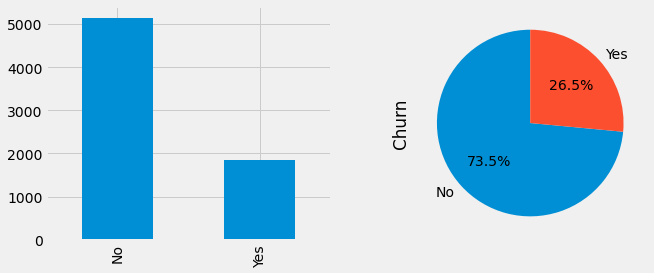

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
df['Churn'].value_counts().plot(kind='bar', ax=ax[0])
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=ax[1])
plt.show()

In [14]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

>- Rasio churn yes sebesar 3x churn no maka data imbalance

**Memisahkan data numerik dan kategori untuk mempermudah plotting**

In [15]:
df_num = df.select_dtypes('number')
df_cat = df.select_dtypes('object')
col_num = df_num.columns.tolist()
col_cat = df_cat.columns.tolist()
print('numerical columns : {}'.format(col_num))
print('========')
print('categorical columns : {}'.format(col_cat))

numerical columns : ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical columns : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [16]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<Figure size 720x432 with 0 Axes>

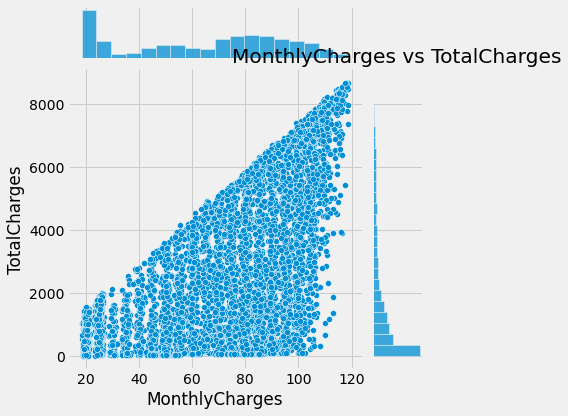

In [17]:
plt.figure(figsize=(10,6))
sns.jointplot(data=df, x='MonthlyCharges', y='TotalCharges', kind='scatter')
plt.title('MonthlyCharges vs TotalCharges')
plt.show()

>- Semakin besar MontlyCharges maka semakin besar pula TotalCharges namun ada berapa yang justru sebaliknya hal ini dikarenakan TotalCharges dipengaruhi pula dengan berapa lama konsumen sudah berlayanan

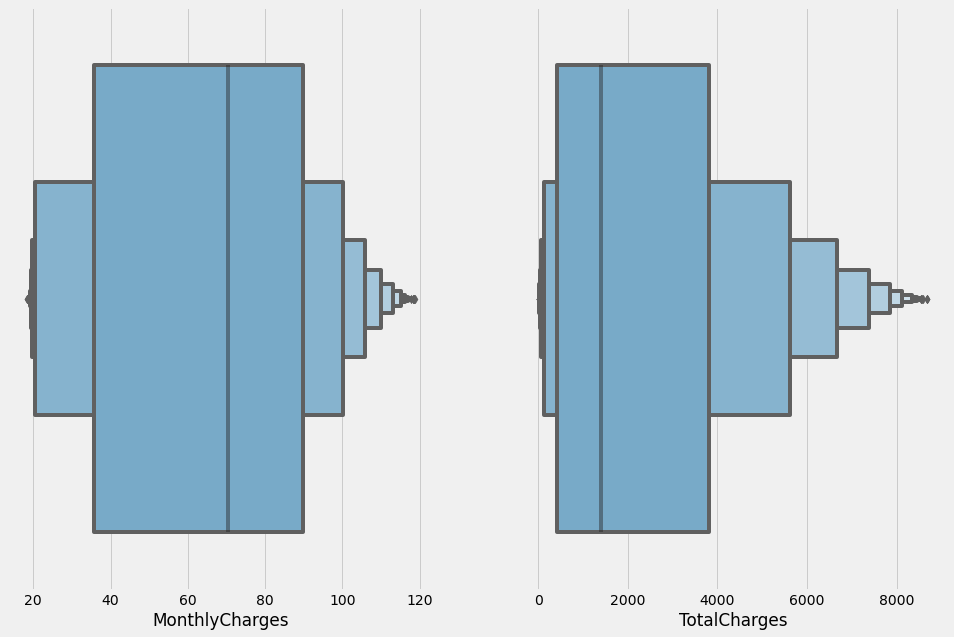

In [18]:
plt.figure(figsize=(15,10))
ax = plt.subplot(1,2,1)
sns.boxenplot(df['MonthlyCharges'], palette = 'Blues', ax=ax)
ax2 = plt.subplot(1,2,2)
sns.boxenplot(df['TotalCharges'], palette = 'Blues', ax=ax2)
plt.show()

>- Kebanyakn konsumen membayar 40-80 perbulan dan total pembayaran 500-4000
>- **Dari sini kemungkinan perusahaan dapat memberikan paket - paket layanan dalam rentang tersebut**

**Melihat berapa lama konsumen berlangganan sampai churn atau tidak**

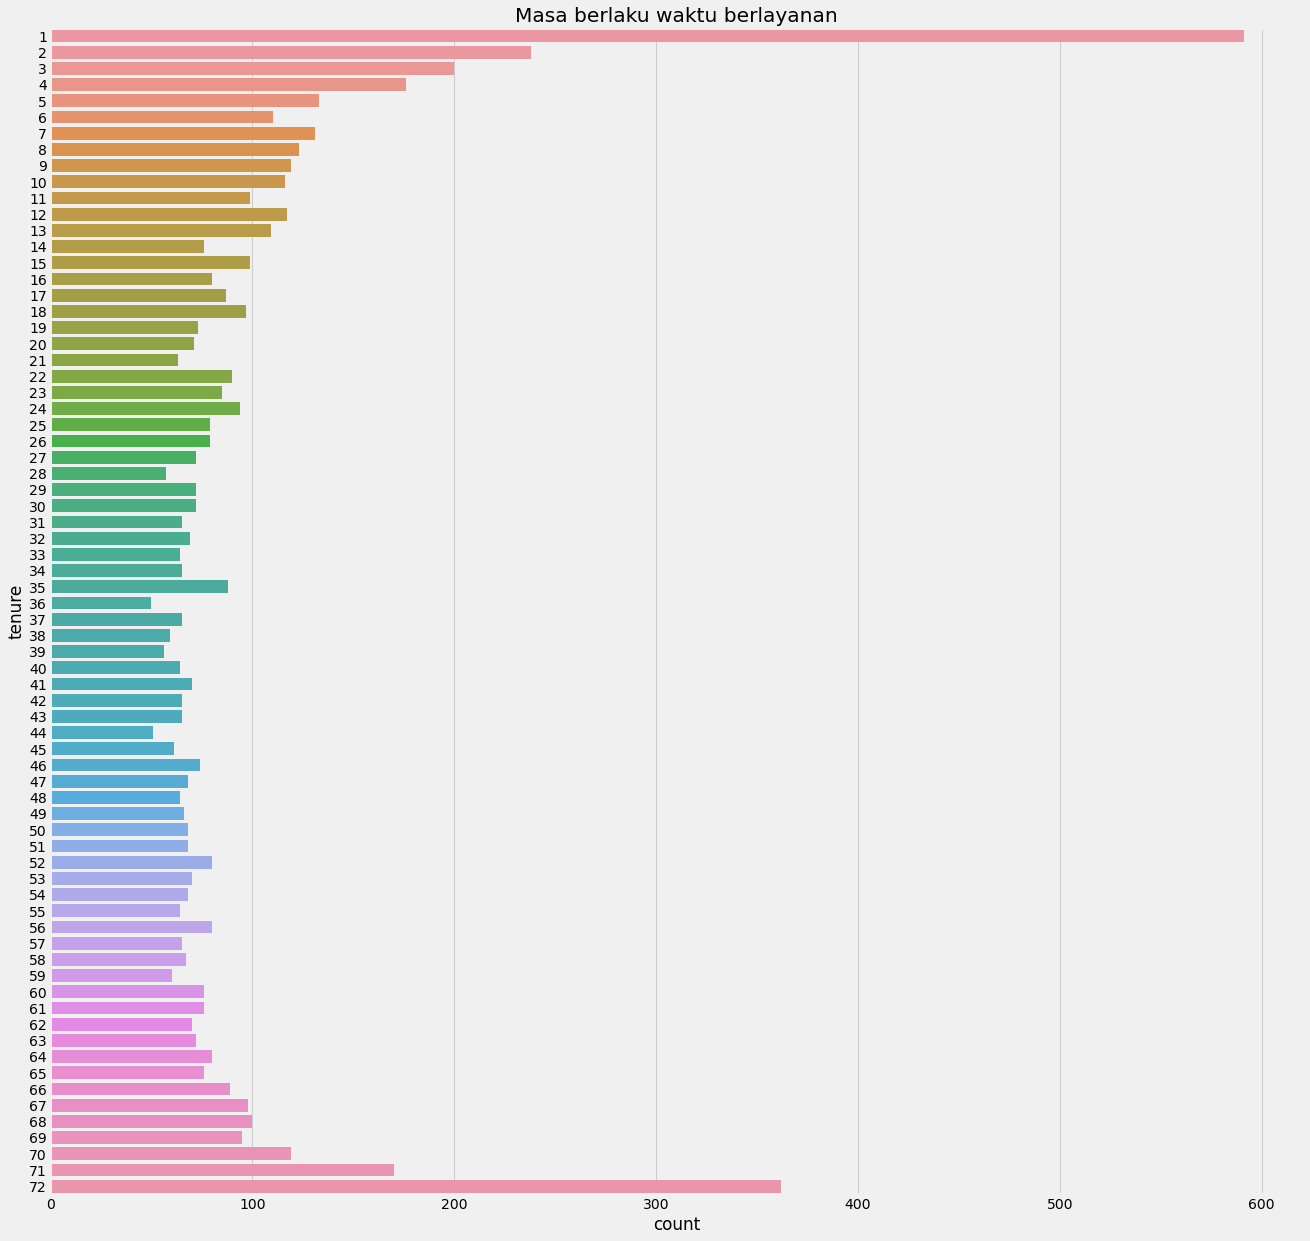

In [19]:
fig, ax = plt.subplots(figsize=(20,20))
sns.countplot(data=df_num, y='tenure')
plt.title('Masa berlaku waktu berlayanan')
plt.show()

>- Dilihat banyak sekali konsumen yang tenurenya hanya 1 bulan bisa kita ambil kesimpulan bahwa banyak pelanggan yang hanya coba-coba berlayanan

**Melihat komposisi tiap feature**

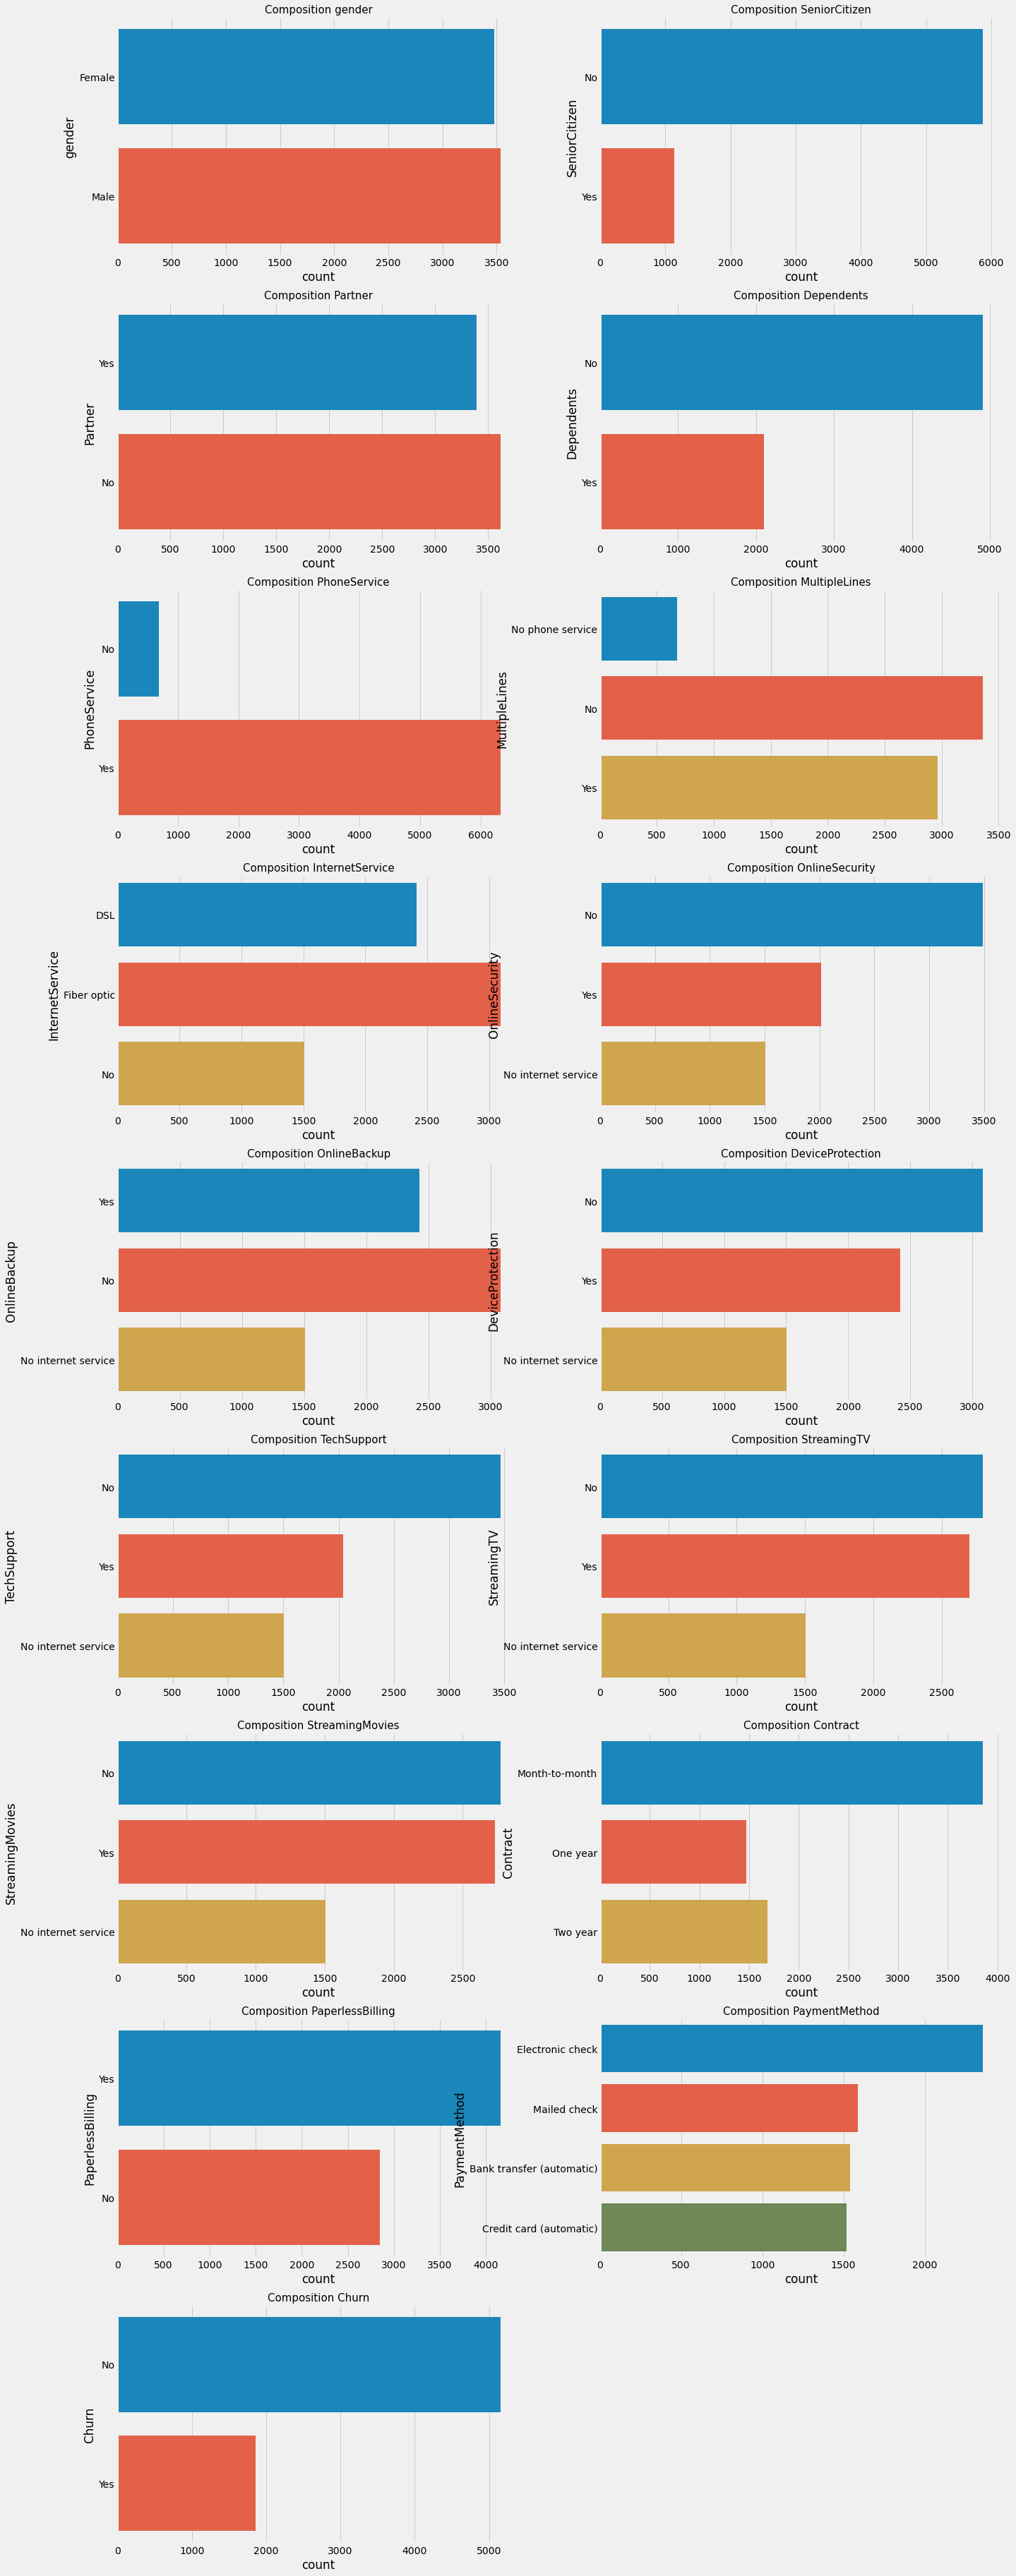

In [20]:
plt.figure(figsize=(20,110))
for i, col_cat in enumerate(df_cat):
    ax = plt.subplot(16, 2, i+1)
    sns.countplot(y=df_cat[col_cat], data= df_cat, ax=ax, orient='h')
    plt.title('Composition '+str(col_cat), fontsize = 15)
plt.show()

>- Partner dan Gender punya komposisi yang sama
>- Kebanyakan konsumen bukan SeniorCitizen yaitu pelanggan umur 65 ke atas
>- Kebanyakan pelanggan punya tanggunan
>- Kebanyakan pelanggan punya layanan telefon
>- Kebanyakan pelanggan menggunakan fiber optic dengan kata lain internet yang cepat
>- Kebanyakan pelanggan kurang memperhatikan OnlineBackup, OnlineSecurity, DeviceProtection, dan TechSupport yang mana dalam menjelajahi dunia internet ini merupakan hal yang penting kedepannya mungkin perusahaan dapat memberikan edukasi lebih lanjut
>- Terlihat kebanyakan pelanggan lebih suka penagihan tanpa kertas 

**Melihat komposisi tiap feature terhadap labelnya**

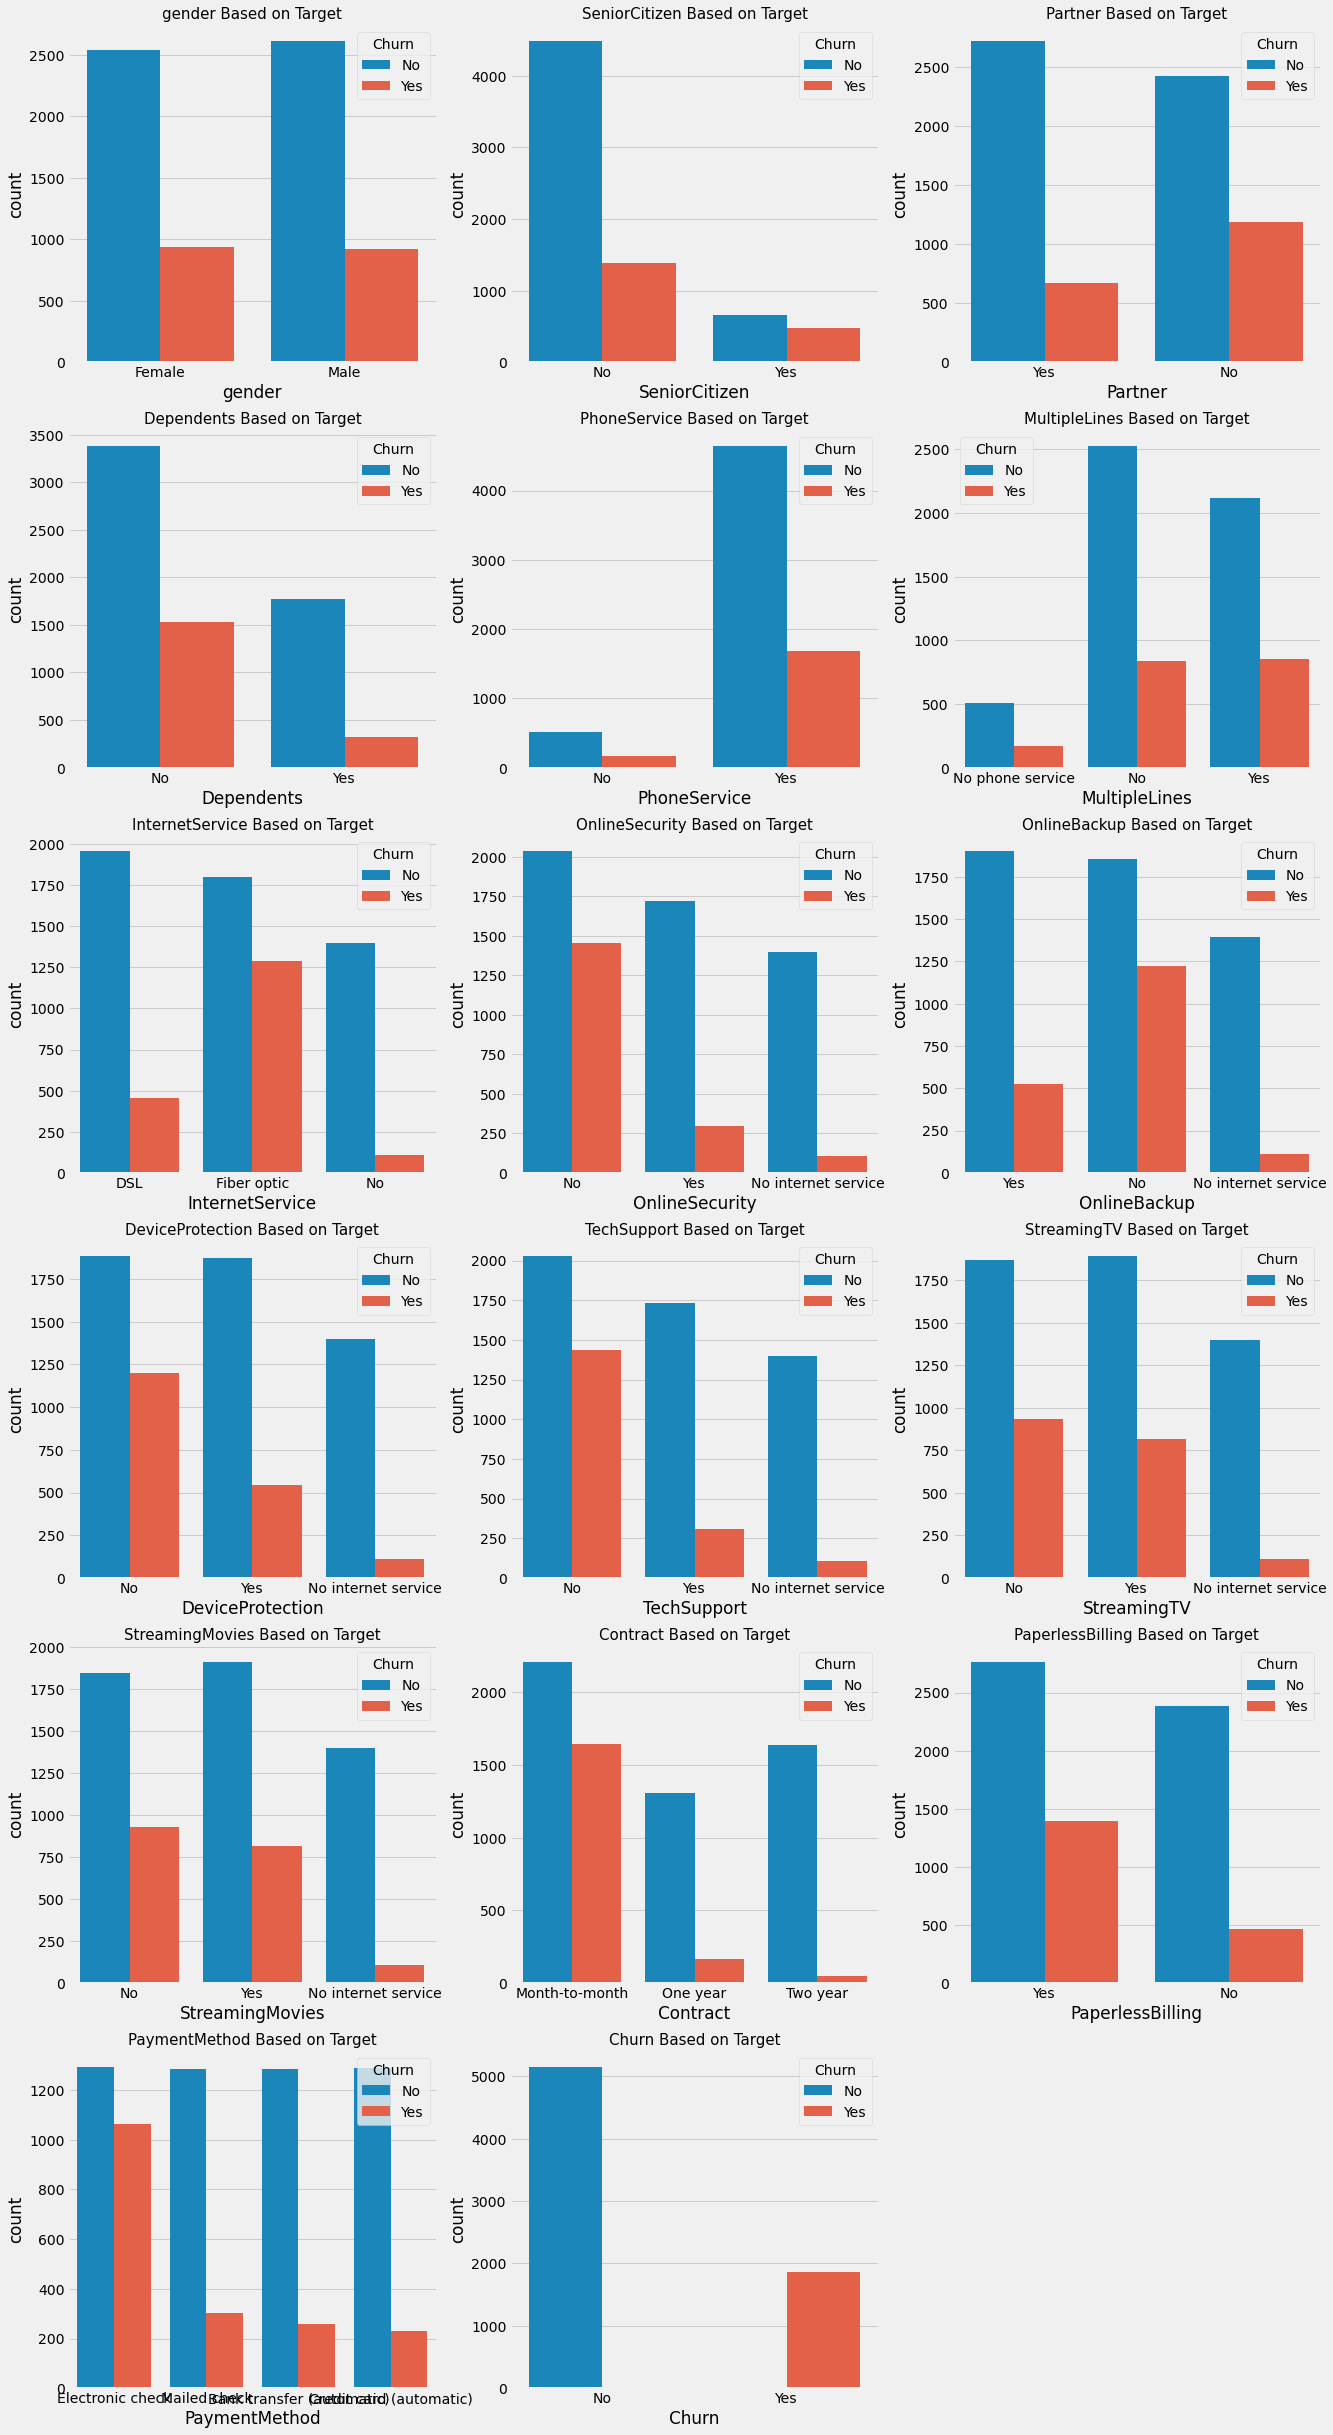

In [21]:
plt.figure(figsize=(20,110))
for i, col_cat in enumerate(df_cat):
    ax = plt.subplot(16, 3, i+1)
    sns.countplot(x=df_cat[col_cat], hue=df_cat['Churn'], data= df_cat, ax=ax)
    plt.title(str(col_cat)+' Based on Target', fontsize = 15)
plt.show()

>- Grafik batang merah menunjukkan churn dari gambar di atas dapat dilihat unik feature apa saja yang cenderung churn sehingga dapat diberikan perhatian lebih
>- Pelanngan dengan electronic check cenderung churn
>- Pelanngan dengan Month-to-month check cenderung churn
>- Pelanggan yang tidak berlayanan OnlineBackup, OnlineSecurity, DeviceProtection, dan TechSupport cenderung churn

# Data Preprocessing

**Menyalin DataFrame menjadi DataFramePreprocessing untuk menjaga keaslian data**

In [22]:
dtp = df.copy()
dtp

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


**Mendefinisikan list feature kategori yang akan di encoding sebelum masuk model**

In [23]:
dtp_cat = dtp.select_dtypes('object').columns
dtp_cat

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

**Melakukan proses label encoding**

In [24]:
encoder = LabelEncoder()
for i in dtp_cat:
    dtp[i] = encoder.fit_transform(dtp[i])
dtp

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


**Splitting data X, y kemudian data train, dan test**

In [25]:
X = dtp.drop(columns=['Churn'])
y = dtp['Churn']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
X_train_full.shape, y_train_full.shape

((5608, 19), (5608,))

In [27]:
y_train_full.value_counts()

0    4122
1    1486
Name: Churn, dtype: int64

**Handling data imbalance dengan SMOTE**

In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_full, y_train_full = smote.fit_resample(X_train_full, y_train_full)

In [29]:
y_train_full.value_counts()

0    4122
1    4122
Name: Churn, dtype: int64

**Splitting data train menjadi data train dan validation**

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, 
                                                  test_size=0.2, random_state=42, stratify=y_train_full)

**Masukkan data ke dalam tensorflow dan normalisasi**

In [31]:
print(f'data train {X_train.shape}')
print(f'data validation {X_val.shape}')
print(f'data test {X_test.shape}')

data train (6595, 19)
data validation (1649, 19)
data test (1402, 19)


In [32]:
import tensorflow as tf

batch_size = 8
data_train = tf.data.Dataset.from_tensor_slices((X_train,y_train)).shuffle(len(X_train)).batch(batch_size)
data_val = tf.data.Dataset.from_tensor_slices((X_val,y_val)).shuffle(len(X_test)).batch(batch_size)
data_test = tf.data.Dataset.from_tensor_slices((X_test,y_test)).shuffle(len(X_val)).batch(batch_size)

In [33]:
# code ini digunakan hanya untuk mengecek apakah data bisa menjadi tensor
tf.convert_to_tensor(X_train)

<tf.Tensor: shape=(6595, 19), dtype=float64, numpy=
array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.03802086e+02, 5.42911367e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 8.70224919e+01, 7.13063928e+02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.94000000e+01, 5.78500000e+02],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.00000000e+00, 6.19000000e+01, 2.64710000e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.00000000e+00, 9.05327955e+01, 9.05327955e+01],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 7.09500000e+01, 4.74145000e+03]])>

In [34]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train)

## Sequential API

In [35]:
import tensorflow as tf
from tensorflow import keras

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Define model
model = keras.Sequential([
    normalizer,
    keras.layers.Dense(15, input_shape=(19,), kernel_initializer='he_normal' ,activation='leaky_relu'),
    keras.layers.Dense(10, kernel_initializer='he_normal', activation='leaky_relu'),
    keras.layers.Dense(5, kernel_initializer='he_normal', activation='leaky_relu'),
    keras.layers.Dense(1, kernel_initializer="he_normal", activation="leaky_relu")
])

model.compile(optimizer ='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 19)               39        
 n)                                                              
                                                                 
 dense (Dense)               (None, 15)                300       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 560
Trainable params: 521
Non-trainable params: 39
_________________________________________________________

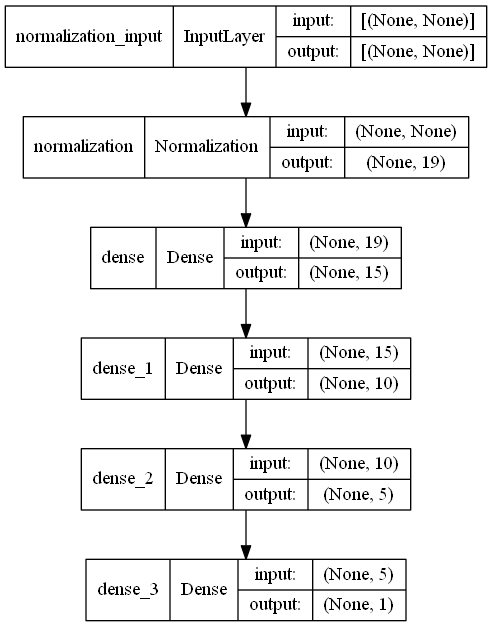

In [37]:
keras.utils.plot_model(model,"ANN_model.png", show_shapes=True)

In [38]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_loss' , patience=10)

In [39]:
history = model.fit(data_train, validation_data=data_val, epochs=50, callbacks=earlystop)

Epoch 1/50
825/825 [==============================] - 9s 9ms/step - loss: 6.0424 - accuracy: 0.4966 - val_loss: 3.1464 - val_accuracy: 0.6919
Epoch 2/50
825/825 [==============================] - 7s 9ms/step - loss: 2.2309 - accuracy: 0.7105 - val_loss: 1.4402 - val_accuracy: 0.7144
Epoch 3/50
825/825 [==============================] - 7s 9ms/step - loss: 1.5057 - accuracy: 0.7337 - val_loss: 1.2479 - val_accuracy: 0.7132
Epoch 4/50
825/825 [==============================] - 7s 8ms/step - loss: 0.8849 - accuracy: 0.7242 - val_loss: 0.8165 - val_accuracy: 0.7198
Epoch 5/50
825/825 [==============================] - 8s 9ms/step - loss: 0.6938 - accuracy: 0.7325 - val_loss: 0.8130 - val_accuracy: 0.7362
Epoch 6/50
825/825 [==============================] - 7s 9ms/step - loss: 0.6637 - accuracy: 0.7384 - val_loss: 0.7190 - val_accuracy: 0.6877
Epoch 7/50
825/825 [==============================] - 7s 9ms/step - loss: 0.5839 - accuracy: 0.7407 - val_loss: 0.6083 - val_accuracy: 0.7223
Epoch 

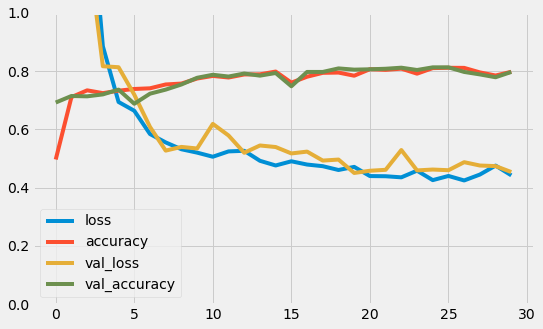

In [40]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [41]:
model.evaluate(data_test)
y_pred = model.predict(X_test)
y_pred

176/176 [==============================] - 1s 5ms/step - loss: 0.5062 - accuracy: 0.7525


array([[0.7251303 ],
       [0.21663922],
       [0.04363259],
       ...,
       [0.47395712],
       [0.14173691],
       [0.13631956]], dtype=float32)

In [42]:
y_pred_threshold = []
for threshold in y_pred:
    if threshold > 0.5:
        y_pred_threshold.append(1)
    else:
        y_pred_threshold.append(0)

In [43]:
print(f'ROC AUC SCORE : {round((roc_auc_score(y_test,y_pred_threshold)),2)}\n')
print(f'CLASSIFICATION REPORT : \n{classification_report(y_test,y_pred_threshold)}')

ROC AUC SCORE : 0.72

CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       0.87      0.79      0.82      1031
           1       0.53      0.66      0.59       371

    accuracy                           0.75      1402
   macro avg       0.70      0.72      0.70      1402
weighted avg       0.78      0.75      0.76      1402



## Functional API

In [66]:
from tensorflow.keras import Model
from tensorflow.keras import Input

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Normalize
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train)

# Define model
input_data = Input(shape=(19,))
layer_0 = normalizer(input_data)
layer_1 = Dense(15, kernel_initializer='he_normal', activation='leaky_relu')(layer_0)
layer_2 = Dense(10, kernel_initializer='he_normal', activation='leaky_relu')(layer_1)
layer_3 = Dense(5, kernel_initializer='he_normal', activation='leaky_relu')(layer_2)
output = Dense(1, kernel_initializer='he_normal', activation='leaky_relu')(layer_3)
model_func = Model(inputs=input_data, outputs=output)

model_func.compile(optimizer ='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [67]:
model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19)]              0         
                                                                 
 normalization (Normalizatio  (None, 19)               39        
 n)                                                              
                                                                 
 dense (Dense)               (None, 15)                300       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                             

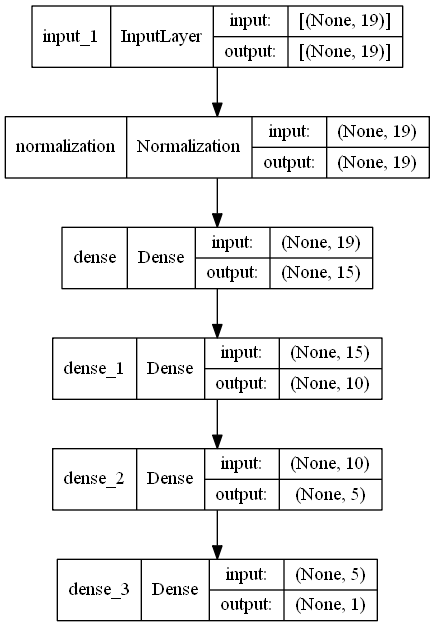

In [68]:
keras.utils.plot_model(model_func,"ANN_Function_model.png", show_shapes=True)

In [69]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_loss' , patience=10)

In [70]:
history = model_func.fit(data_train, validation_data=data_val, epochs=50, callbacks=earlystop)

Epoch 1/50
825/825 [==============================] - 9s 10ms/step - loss: 5.9878 - accuracy: 0.5027 - val_loss: 3.3527 - val_accuracy: 0.6434
Epoch 2/50
825/825 [==============================] - 8s 9ms/step - loss: 2.3854 - accuracy: 0.6996 - val_loss: 1.9429 - val_accuracy: 0.7210
Epoch 3/50
825/825 [==============================] - 7s 9ms/step - loss: 1.5665 - accuracy: 0.7233 - val_loss: 1.2344 - val_accuracy: 0.7314
Epoch 4/50
825/825 [==============================] - 8s 9ms/step - loss: 0.8940 - accuracy: 0.7037 - val_loss: 0.8061 - val_accuracy: 0.7247
Epoch 5/50
825/825 [==============================] - 7s 9ms/step - loss: 0.6245 - accuracy: 0.7348 - val_loss: 0.5963 - val_accuracy: 0.7429
Epoch 6/50
825/825 [==============================] - 8s 9ms/step - loss: 0.5726 - accuracy: 0.7231 - val_loss: 0.5722 - val_accuracy: 0.7368
Epoch 7/50
825/825 [==============================] - 7s 9ms/step - loss: 0.5183 - accuracy: 0.7571 - val_loss: 0.5191 - val_accuracy: 0.7690
Epoch

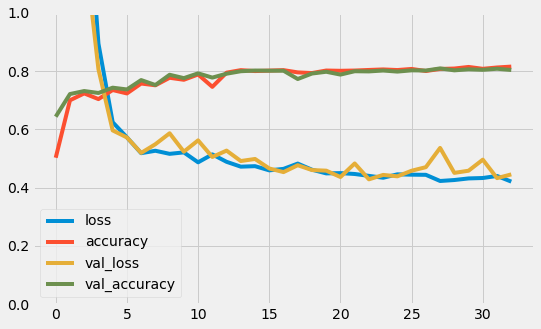

In [71]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [50]:
model_func.evaluate(data_test)
y_pred = model_func.predict(data_test)
y_pred

176/176 [==============================] - 1s 5ms/step - loss: 0.5382 - accuracy: 0.7668


array([[ 0.46612203],
       [-0.02560714],
       [-0.01367073],
       ...,
       [ 0.44615227],
       [ 0.36696833],
       [ 0.39870155]], dtype=float32)

In [51]:
y_pred_threshold = []
for threshold in y_pred:
    if threshold > 0.5:
        y_pred_threshold.append(1)
    else:
        y_pred_threshold.append(0)

In [52]:
print(f'ROC AUC SCORE : {round((roc_auc_score(y_test,y_pred_threshold)),2)}\n')
print(f'CLASSIFICATION REPORT : \n{classification_report(y_test,y_pred_threshold)}')

ROC AUC SCORE : 0.48

CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       0.73      0.68      0.70      1031
           1       0.24      0.28      0.26       371

    accuracy                           0.58      1402
   macro avg       0.48      0.48      0.48      1402
weighted avg       0.60      0.58      0.59      1402



**Kesimpulan antara model sequential dan functional**
- Sequential = Model evaluate : loss: 0.5062 - accuracy: 0.7525 || accuracy_score 0.72, roc_auc_score 0.75
- Functional = Model evaluate : loss: 0.5382 - accuracy: 0.7668 || accuracy_score 0.48, roc_auc_score 0.58

>- Didapatkan roc auc score dan accuracy untuk model sequential adalah 0.72|0.75 dan model functional adalah 0.48|0.58, hal ini mungkin saja terjadi karena saat data diacak dan dievaluasi kebetulan hasilnya bagus saja pada suatu model. Meskipun begitu dengan menggunakan model.evaluate hasilnya tidak berbeda secara signifikan 
sequential loss: 0.5062 - accuracy: 0.7525 | functional loss: 0.5382 - accuracy: 0.7668
>- Kemudian akan dilakukan improvement dengan model functional

**Perbandingan antara model sequential dan functional jika dillihat berdasarkan accuracy score dan roc auc score, model sequential lebih baik namun berdasarkan model.evaluate tidak jauh berbeda bahkan functional accuracynya lebih besar**

In [72]:
np.round(0.7525,2), np.round(0.7668,2)

(0.75, 0.77)

# Model Improvement

In [54]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Normalize
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train)

# Define model
input_data = Input(shape=(19,))
layer_0 = normalizer(input_data)
layer_1 = Dense(16, kernel_initializer='uniform', activation='leaky_relu')(layer_0)
batch_1 = keras.layers.BatchNormalization()(layer_1)
drop_1 = keras.layers.Dropout(rate=0.2)(batch_1)

layer_2 = Dense(13, kernel_initializer='uniform', activation='leaky_relu')(drop_1)
batch_2 = keras.layers.BatchNormalization()(layer_2)
drop_2 = keras.layers.Dropout(rate=0.2)(batch_2)

layer_3 = Dense(10, kernel_initializer='uniform', activation='leaky_relu')(drop_2)
batch_3 = keras.layers.BatchNormalization()(layer_3)
drop_3 = keras.layers.Dropout(rate=0.2)(batch_3)

layer_4 = Dense(7, kernel_initializer='uniform', activation='leaky_relu')(drop_3)
batch_4 = keras.layers.BatchNormalization()(layer_4)
drop_4 = keras.layers.Dropout(rate=0.2)(batch_4)

layer_5 = Dense(4, kernel_initializer='uniform', activation='leaky_relu')(drop_4)
batch_5 = keras.layers.BatchNormalization()(layer_5)
drop_5 = keras.layers.Dropout(rate=0.2)(batch_5)

output = Dense(1, kernel_initializer='uniform', activation='sigmoid')(drop_5)
model_imp = Model(inputs=input_data, outputs=output)

model_imp.compile(optimizer ='adamax',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [55]:
model_imp.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19)]              0         
                                                                 
 normalization (Normalizatio  (None, 19)               39        
 n)                                                              
                                                                 
 dense (Dense)               (None, 16)                320       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 13)                221   

In [56]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_loss' , patience=10)

In [57]:
history = model_imp.fit(data_train, validation_data=data_val, epochs=50, callbacks=earlystop)

Epoch 1/50
825/825 [==============================] - 19s 21ms/step - loss: 0.5910 - accuracy: 0.7237 - val_loss: 0.4731 - val_accuracy: 0.7865
Epoch 2/50
825/825 [==============================] - 16s 20ms/step - loss: 0.5259 - accuracy: 0.7578 - val_loss: 0.4470 - val_accuracy: 0.7999
Epoch 3/50
825/825 [==============================] - 17s 20ms/step - loss: 0.5122 - accuracy: 0.7733 - val_loss: 0.4428 - val_accuracy: 0.7993
Epoch 4/50
825/825 [==============================] - 17s 20ms/step - loss: 0.5066 - accuracy: 0.7724 - val_loss: 0.4386 - val_accuracy: 0.7993
Epoch 5/50
825/825 [==============================] - 17s 20ms/step - loss: 0.5054 - accuracy: 0.7666 - val_loss: 0.4335 - val_accuracy: 0.8047
Epoch 6/50
825/825 [==============================] - 17s 20ms/step - loss: 0.5036 - accuracy: 0.7739 - val_loss: 0.4368 - val_accuracy: 0.8041
Epoch 7/50
825/825 [==============================] - 18s 22ms/step - loss: 0.4965 - accuracy: 0.7756 - val_loss: 0.4263 - val_accuracy:

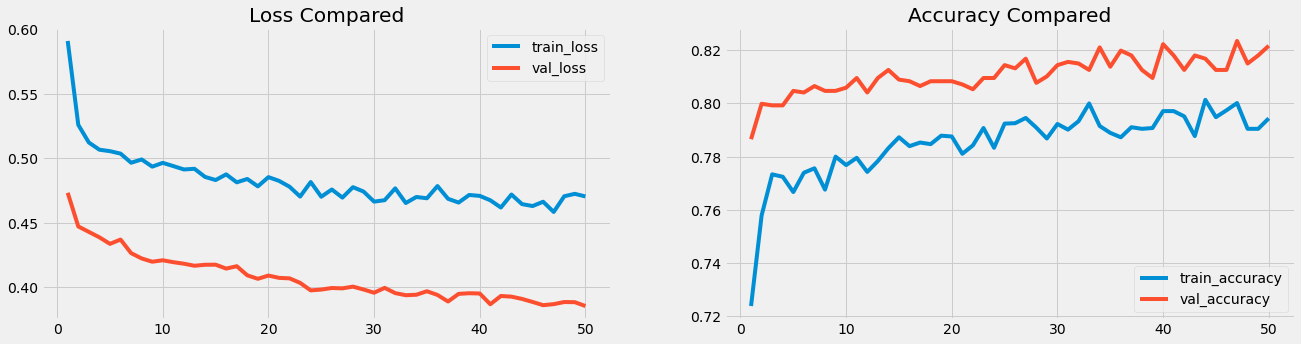

In [59]:
x_axis = np.arange(1,51) # Range sesuaikan dengan last epoch
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].plot(x_axis, history.history['loss'], label='train_loss')
ax[0].plot(x_axis, history.history['val_loss'], label='val_loss')
ax[0].set_title('Loss Compared')
ax[0].legend()

ax[1].plot(x_axis, history.history['accuracy'], label='train_accuracy')
ax[1].plot(x_axis, history.history['val_accuracy'], label='val_accuracy')
ax[1].set_title('Accuracy Compared')
ax[1].legend()
plt.show()

In [61]:
model_imp.evaluate(data_test)
y_pred = model_imp.predict(data_test)
y_pred

176/176 [==============================] - 1s 8ms/step - loss: 0.4569 - accuracy: 0.7782


array([[0.04657793],
       [0.2154846 ],
       [0.05093793],
       ...,
       [0.08619586],
       [0.89653623],
       [0.5066781 ]], dtype=float32)

In [63]:
y_pred_threshold = []
for threshold in y_pred:
    if threshold > 0.5:
        y_pred_threshold.append(1)
    else:
        y_pred_threshold.append(0)

In [64]:
print(f'ROC AUC SCORE : {round((roc_auc_score(y_test,y_pred_threshold)),2)}\n')
print(f'CLASSIFICATION REPORT : \n{classification_report(y_test,y_pred_threshold)}')

ROC AUC SCORE : 0.51

CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1031
           1       0.28      0.33      0.30       371

    accuracy                           0.60      1402
   macro avg       0.51      0.51      0.51      1402
weighted avg       0.62      0.60      0.61      1402



**Kesimpulan model functional dan improvement**
- Functional = Model evaluate : loss: 0.5382 - accuracy: 0.7668 || accuracy_score 0.48, roc_auc_score 0.58
- Improvement = Model evaluate : loss: 0.4569 - accuracy: 0.7782 || accuracy_score 0.51, roc_auc_score 0.60

>- Didapatkan roc auc score dan accuracy untuk model improvement adalah 0.51|0.60 dan model functional adalah 0.48|0.58, 
improvement loss: 0.4569 - accuracy: 0.7782 | functional accuracy_score 0.51, roc_auc_score 0.60
>- **Terdapat kenaikan accuracy 0.3 dan roc auc 0.2 dan model evaluate: loss:0.9 dan acc:0.1**

# Model Inference

In [73]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5623,1,0,0,0,52,1,0,1,0,2,2,1,2,1,1,0,0,103.802086,5429.113673
8160,1,0,0,0,8,1,0,1,0,0,0,0,0,2,0,1,1,87.022492,713.063928
1669,0,0,0,0,30,1,0,2,1,1,1,1,1,1,2,0,1,19.400000,578.500000
2915,1,0,1,1,46,1,0,0,2,0,2,2,2,2,2,0,3,81.000000,3846.350000
6986,0,0,0,0,6,1,0,1,0,2,0,0,0,2,0,1,2,88.061169,554.396793


In [74]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [75]:
X_train.shape

(6595, 19)

In [76]:
col=X_train.columns.to_list()
val=[['Male', 
      'Yes',
      'No',
      'No',
      29,
      'Yes',
      'No',
      'Fiber optic',
      'No',
      'Yes',
      'No',
      'Yes',
      'Yes',
      'No',
      'Month-to-month',
      'No',
      'Electronic check',
      30,
      2000]]
new_data=pd.DataFrame(val,columns=col)
new_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,Yes,No,No,29,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,No,Month-to-month,No,Electronic check,30,2000


In [77]:
new_data_cat = new_data.select_dtypes('object').columns
encoder = LabelEncoder()
for i in new_data_cat:
    new_data[i] = encoder.fit_transform(new_data[i])
new_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,30,2000


In [78]:
new_pred = model_imp.predict(new_data)
print(new_pred)
if new_pred>0.5:
    print('Churn')
else:
    print('Not Churn')

[[0.9365161]]
Churn


In [80]:
model_imp.save('my_model.h5')

In [83]:
load_model = keras.models.load_model("my_model.h5")

# Overall Analysis
- Target aktualnya dalah imbalance dengan rasio 73.5% : 25.5%
- Semakin besar MontlyCharges maka semakin besar pula TotalCharges namun ada beberapa yang tidak ini menidentikasikan adanya pelanggan baru dengan MontlyCharges yang besar
- Kebanyakn konsumen membayar 40-80 perbulan sehingga perusahaan dapat memberikan paket - paket layanan dalam harga tersebut
- Diketahui banyak pelanggan dengan tenure 1 bulan artinya banyak pelanggan yang hanya mencoba berlayanan
- Kebanyakan pelanggan adalah bukan SeniorCitizer (dibawah 65 tahun) mengidentifikasi pelanggan yang masih aktif beraktivitas
- Kebanyakn pelanggan punya tanggungan hidup
- Kebanyakan pelanggan menggunakan fiber optic dengan kata lain internet yang cepat
- Kebanyakan pelanggan kurang memperhatikan OnlineBackup, OnlineSecurity, DeviceProtection, dan TechSupport yang mana dalam menjelajahi dunia internet ini merupakan hal yang penting kedepannya mungkin perusahaan dapat memberikan edukasi lebih lanjut
- Kebanyak pelanggan yang menggunaan fiber optic cenderung churn
- Kebanyaan pelanngan yang Month-to-month cenderung churn
- Sehingga diharapkan perusahaan bisa memberikan paket tahunan dengan penawaran yang menarik
- Pelanggan yang tidak berlayanan OnlineBackup, OnlineSecurity, DeviceProtection, dan TechSupport cenderung churn

# Model Analysis
- Sequential = Model evaluate : loss: 0.5062 - accuracy: 0.7525 || accuracy_score 0.72, roc_auc_score 0.75
- Functional = Model evaluate : loss: 0.5382 - accuracy: 0.7668 || accuracy_score 0.48, roc_auc_score 0.58
- Improvement = Model evaluate : loss: 0.4569 - accuracy: 0.7782 || accuracy_score 0.51, roc_auc_score 0.60

**Pertama-tama dilakukan base model dengan 2 hidden layer, kernel_init :he_normal, activation :leacky_relu, optimizer :adam dengan model sequential dan functional kemudian dilakukan model improvement menggunakan 4 hidden layer, batchnorm, dropout, kernel_init :uniform, optimizer :adamax dan didapatkan hasil model yang lebih baik dari pada sebelumnya**
